In [179]:
#importing relevant modules

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf

In [180]:
combinedf = pd.read_csv('C:\\Users\\sulab\Downloads\\combine.csv')

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\sulab\AppData\Local\Temp\ipykernel_35276\4217344928.py:1: SyntaxWarning: invalid escape sequence '\D'
  combinedf = pd.read_csv('C:\\Users\\sulab\Downloads\\combine.csv')


In [181]:
combinedf.loc[:,['15w','8w','20w','combine']].pct_change()[2:]

,15w,8w,20w,combine
2,9.584357,0.120414,-0.432020,-0.788460
3,0.422680,0.159061,1.104037,2.611939
4,0.076988,0.551071,0.781777,0.968121
5,-0.220034,-0.319080,0.052903,0.308958
6,0.498009,0.260541,0.233436,0.226727
...,...,...,...,...
2583,0.004005,0.000372,0.000971,-0.000084
2584,0.007168,0.004566,-0.000463,-0.000169
2585,0.000333,0.006850,0.002536,0.002731
2586,-0.010592,-0.002436,0.000483,0.002733


In [182]:
#function for importing data
def get_data(stocks, start, end):
    stockData = yf.download(stocks, start, end)
    stockData = stockData['Close']
    returns = stockData.pct_change()
    print(returns)
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return meanReturns, covMatrix

In [183]:
#selecting stocks and date ranges
stockList = ['AAPL','MSFT','GOOG','AMZN','NVDA','META','2330.TW']
# stockList = ['AAPL','GOOG']

stocks = [stock for stock in stockList]
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=10000)

#running function to pull data on selected stocks
meanReturns, covMatrix = get_data(stocks, startDate, endDate)

#evenly weighing each stock in portfolio
weights = [1/(len(stockList))] * len(stockList)

[*********************100%%**********************]  7 of 7 completed

Ticker       2330.TW      AAPL      AMZN      GOOG      META      MSFT  \
Date                                                                     
1997-02-18       NaN       NaN       NaN       NaN       NaN       NaN   
1997-02-19       NaN -0.013985       NaN       NaN       NaN  0.001284   
1997-02-20       NaN -0.035459       NaN       NaN       NaN -0.023077   
1997-02-21       NaN -0.036769       NaN       NaN       NaN -0.002625   
1997-02-24       NaN  0.015273       NaN       NaN       NaN  0.053947   
...              ...       ...       ...       ...       ...       ...   
2024-06-28  0.006250 -0.016254 -0.023250 -0.018410 -0.029525 -0.013029   
2024-07-01  0.002070  0.029105  0.020440  0.005834  0.000912  0.021882   
2024-07-02 -0.008264  0.016240  0.014199  0.011491  0.009551  0.005583   
2024-07-03  0.019792  0.005811 -0.012050  0.004180  0.000903  0.003244   
2024-07-04  0.026558  0.000000  0.000000  0.000000  0.000000  0.000000   

Ticker          NVDA  
Date          


C:\Users\sulab\AppData\Local\Temp\ipykernel_35276\76454690.py:5: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = stockData.pct_change()


In [184]:
covMatrix

Ticker,2330.TW,AAPL,AMZN,GOOG,META,MSFT,NVDA
Ticker,,,,,,,
2330.TW,0.000367,0.000030,0.000038,0.000028,0.000025,0.000016,0.000067
AAPL,0.000030,0.000681,0.000295,0.000198,0.000186,0.000225,0.000374
AMZN,0.000038,0.000295,0.001221,0.000230,0.000250,0.000276,0.000397
GOOG,0.000028,0.000198,0.000230,0.000362,0.000225,0.000179,0.000256
META,0.000025,0.000186,0.000250,0.000225,0.000621,0.000191,0.000288
MSFT,0.000016,0.000225,0.000276,0.000179,0.000191,0.000374,0.000328
NVDA,0.000067,0.000374,0.000397,0.000256,0.000288,0.000328,0.001389


In [185]:
# monte carlo simulation

mc_sims = 100 # number of simulations
T = 100 #timeframe in days


meanM = np.full(shape=(T, len(weights)), fill_value=meanReturns)
meanM = meanM.T
portfolio_sims = np.full(shape=(T, mc_sims), fill_value=0.0)
initialPortfolio = 10000
for m in range(0, mc_sims):
    Z = np.random.normal(size=(T, len(weights)))#uncorrelated RV's
    L = np.linalg.cholesky(covMatrix) #cholesky decomposition
    dailyReturns = meanM + np.inner(L, Z) #correlated daily returns for individual stocks
    portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T)+1)*initialPortfolio

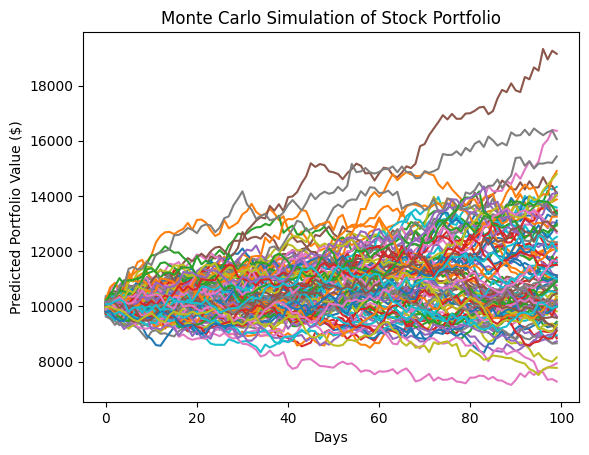

In [186]:
#plotting the simulation
plt.plot(portfolio_sims)
plt.ylabel('Predicted Portfolio Value ($)')
plt.xlabel('Days')
plt.title('Monte Carlo Simulation of Stock Portfolio')
plt.show()

In [187]:
Avg_portf_returns = np.mean(portfolio_sims[T-5:,:]-1)
SD_portf_returns = np.std(portfolio_sims[T-5:,:]-1)
Median_portf_returns = np.median(portfolio_sims[T-5:,:]-1)
print(Avg_portf_returns)
print(SD_portf_returns)
print(Median_portf_returns)

11291.61237718407
2018.2443173233928
10911.685926546896
